In [4]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) 

# Read in the data
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\EXCEL\movies.csv') 


In [6]:
#looking at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [9]:
#Checking for missing data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100  # multiply by 100 to get actual percent
    print('{} - {:.1f}%'.format(col, pct_missing))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.3%
gross - 2.5%
company - 0.2%
runtime - 0.1%


In [13]:
#Data types for Columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
# Changing Data type of columns
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 


In [18]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [20]:
#option two

df['votes'] = df['votes'].fillna(0).astype('int64')

df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [21]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.      146  
1      58853106          Columbia Pictures      104  
2     538375067                  Lucasfilm      124  
3      83453539         Paramount Pictures       88  
4      39846344             Orion Pictures       98  
...         ...                        ...      ...  
7663          0                        NaN       90  
7664          0  Cactus Blue Entertainment       90  
7665          0           Embi Productions        0  
7666          0                        NaN      120  
7667          0                PK 65 Films      102  

[7668 rows x 15 columns]

In [22]:
#Creating correct Year column
df['yearcorrect'] = df['released'].astype(str).str[:4]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime yearcorrect  
0      46998772               Warner Bros.      146        June  
1      58853106          Columbia Pictures      104        July  
2     538375067                  Lucasfilm      124        June  
3      83453539         Paramount Pictures       88        July  
4      39846344             Orion Pictures       98        July  
...         ...                        ...      ...         ...  
7663          0                        NaN       90        Octo  
7664          0  Cactus Blue Entertainment       90        Febr  
7665          0           Embi Productions        0        Apri  
7666          0                        NaN      120        Octo  
7667          0                PK 65 Films      102        Augu  

[7668 rows x 16 columns]

In [25]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [24]:
#Pulling in all the data 

pd.set_option('display.max_rows',None)

In [26]:
#Checking for Duplicates and errasing them
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [ ]:
#to drop any duplicates in the data we say df.drop_duplicates() . This data has non

In [ ]:
#budget has high correlation
#company has high correalation

In [24]:
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

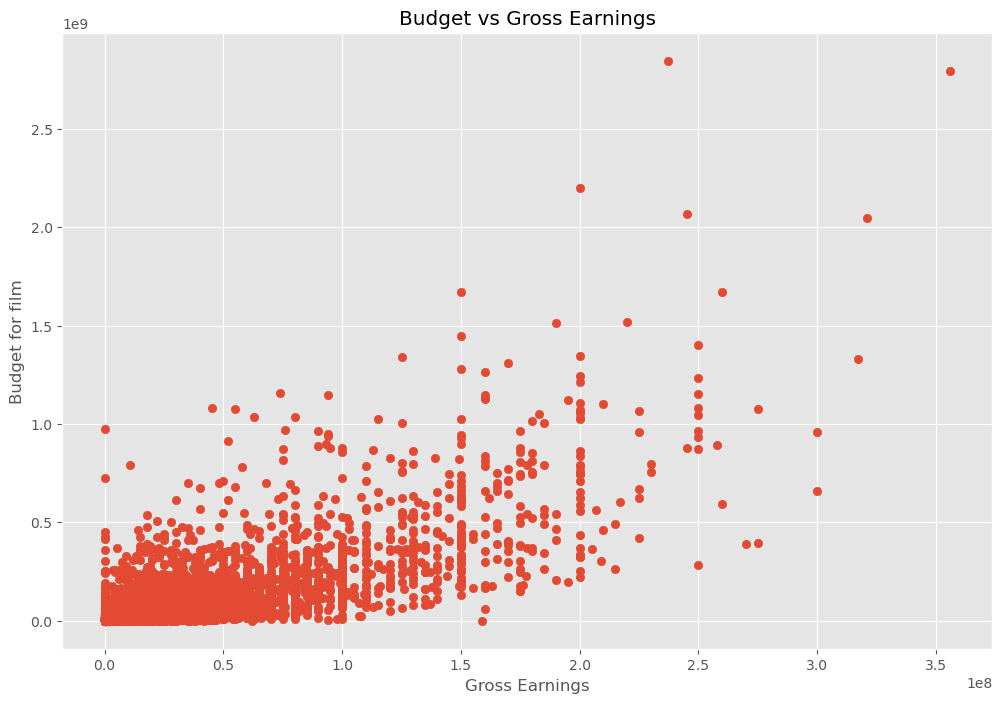

In [25]:
#scatter plot with budget versus gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')

plt.show()

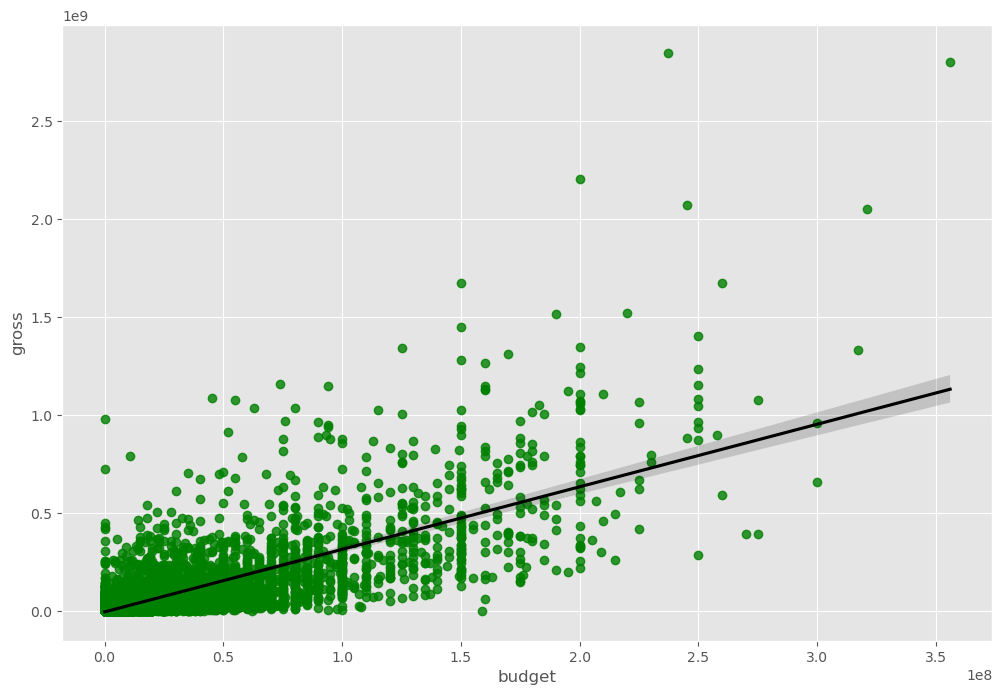

In [42]:
#plotiing the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"green"}, line_kws={"color":"black"})
plt.show()

In [27]:
#The correlation

df.corr(method='pearson', numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

In [11]:
# Correlation matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True)

# Display the matrix
print(correlation_matrix)

# Show the plot
plt.show()
                             

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


In [28]:
df.corr(method='kendall', numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.066796  0.330410  0.209304  0.216595  0.096390
score    0.066796  1.000000  0.300673 -0.004843  0.091331  0.283601
votes    0.330410  0.300673  1.000000  0.439883  0.560449  0.197697
budget   0.209304 -0.004843  0.439883  1.000000  0.541956  0.176184
gross    0.216595  0.091331  0.560449  0.541956  1.000000  0.177429
runtime  0.096390  0.283601  0.197697  0.176184  0.177429  1.000000

In [29]:
df.corr(method='spearman', numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097757  0.468107  0.291152  0.314681  0.141805
score    0.097757  1.000000  0.428810 -0.007002  0.133564  0.399868
votes    0.468107  0.428810  1.000000  0.604693  0.752550  0.289359
budget   0.291152 -0.007002  0.604693  1.000000  0.716816  0.246941
gross    0.314681  0.133564  0.752550  0.716816  1.000000  0.257478
runtime  0.141805  0.399868  0.289359  0.246941  0.257478  1.000000

In [ ]:
#visualizing high correlation between budget and gross

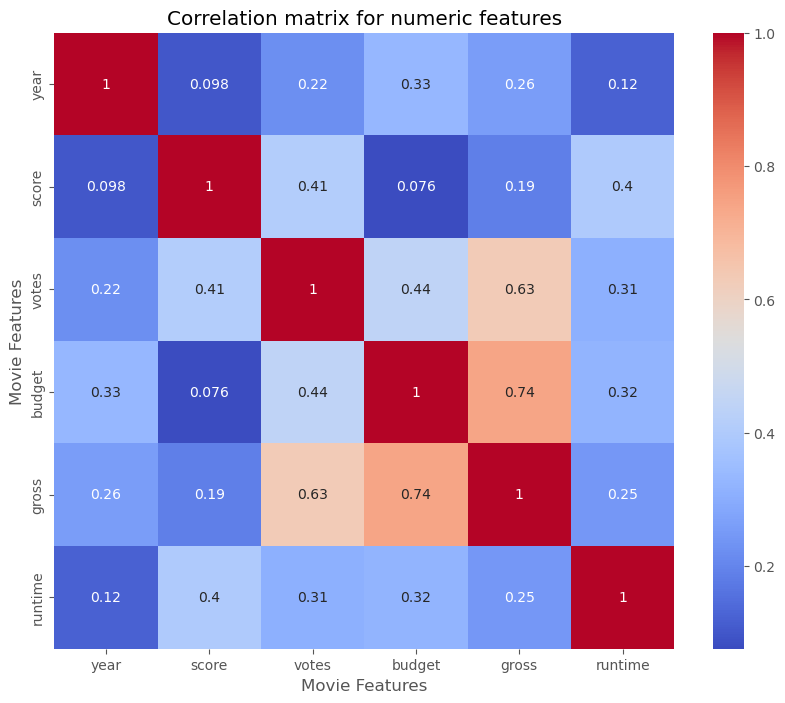

In [30]:
plt.figure(figsize=(10,8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [21]:
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)


In [22]:
df = df.fillna(0)  # replace all NaNs with 0

In [23]:
#Looking at company
df_numerized = df.copy()  # Make a copy to be safe

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized


name  rating  genre  year  released  score      votes  director  writer  \
0     6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1     5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2     5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3      286       5      4  1980      1493    7.7   221000.0      1301    2001   
4     1027       7      4  1980      1544    7.3   108000.0      1054     522   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  3705       0      6  2020      2965    3.1       18.0      1500    2290   
7664  1678       0      4  2020      1108    4.7       36.0       774    2615   
7665  4717       0      6  2020       194    5.7       29.0      2061    2684   
7666  2843       0      6  2020      2818    0.0        0.0      1184    1825   
7667  5394       0     10  2020       392    5.7        7.0      2165    3345   

      star  country      budget        gross  company  runtime  
0     1048       55  19000000.0   46998772.0     2320    146.0  
1      328       56   4500000.0   58853106.0      732    104.0  
2     1746       56  18000000.0  538375067.0     1541    124.0  
3     2247       56   3500000.0   83453539.0     1813     88.0  
4      411       56   6000000.0   39846344.0     1778     98.0  
...    ...      ...         ...          ...      ...      ...  
7663  2422       56      7000.0          0.0        0     90.0  
7664  1887       56         0.0          0.0      540     90.0  
7665  2041       56     58750.0          0.0      942      0.0  
7666   451       56     15000.0          0.0        0    120.0  
7667  2464       45         0.0          0.0     1788    102.0  

[7668 rows x 15 columns]

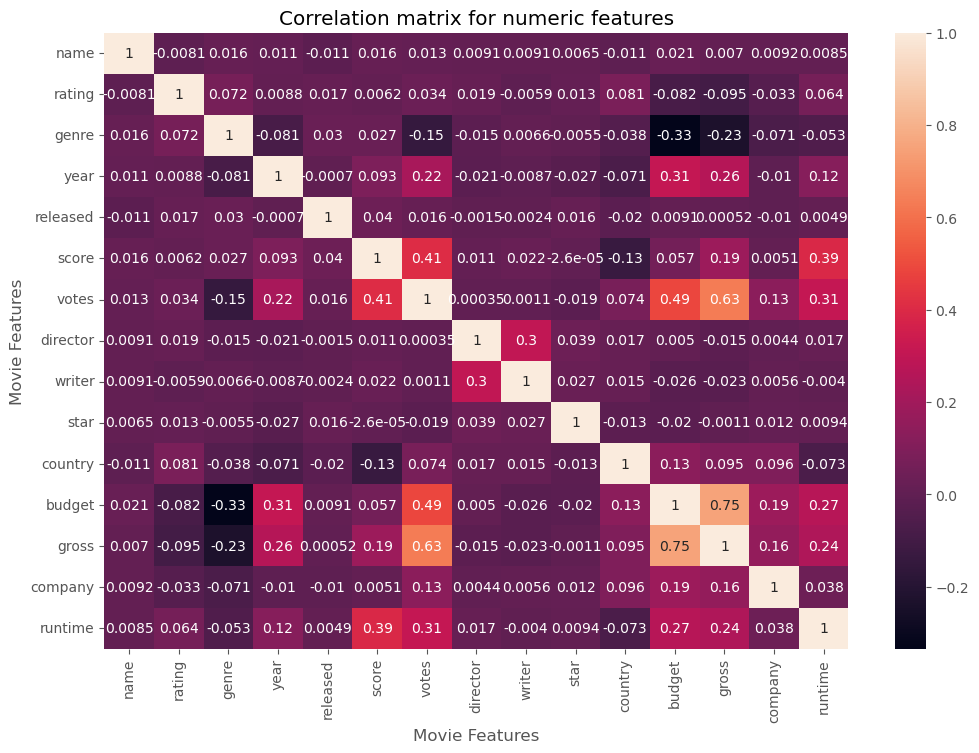

In [32]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [34]:

df_numerized.corr(method='pearson', numeric_only=True)

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score     0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes     0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget    0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross     0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.005081   
runtime   0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   

             votes  director    writer      star   country    budget  \
name      0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating    0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre    -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year      0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released  0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score     0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes     1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director  0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer    0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star     -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country   0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget    0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross     0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company   0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime   0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   

             gross   company   runtime  
name      0.006989  0.009211  0.008483  
rating   -0.095450 -0.032943  0.064133  
genre    -0.234297 -0.071067 -0.052914  
year      0.261900 -0.010431  0.116358  
released  0.000519 -0.010474  0.004852  
score     0.186012  0.005081  0.394564  
votes     0.632870  0.133457  0.306984  
director -0.014916  0.004404  0.017062  
writer   -0.022997  0.005646 -0.004036  
star     -0.001129  0.012442  0.009418  
country   0.095325  0.095548 -0.073319  
budget    0.750157  0.186474  0.268372  
gross     1.000000  0.156745  0.244339  
company   0.156745  1.000000  0.037537  
runtime   0.244339  0.037537  1.000000

In [35]:
#Unstucking the correlation matrix option one
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.073319
         budget      0.268372
         gross       0.244339
         company     0.037537
         runtime     1.000000
Length: 225, dtype: float64

In [36]:
#option two
sorted_pairs = corr_pairs.sort_values
sorted_pairs

<bound method Series.sort_values of name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.073319
         budget      0.268372
         gross       0.244339
         company     0.037537
         runtime     1.000000
Length: 225, dtype: float64>

In [44]:
 #correlation matrix
corr_matrix = df_numerized.corr(method='pearson', numeric_only=True)


In [45]:
# Unstack it into pairs
corr_pairs = corr_matrix.unstack()

In [46]:
# Sort the pairs
sorted_pairs = corr_pairs.sort_values()

In [47]:
# Filter only high correlations
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

votes     gross       0.632870
gross     votes       0.632870
budget    gross       0.750157
gross     budget      0.750157
released  released    1.000000
score     score       1.000000
rating    rating      1.000000
name      name        1.000000
genre     genre       1.000000
year      year        1.000000
director  director    1.000000
votes     votes       1.000000
writer    writer      1.000000
star      star        1.000000
budget    budget      1.000000
country   country     1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings